# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Sara Niemann

Datum: 19.11.2023

Gruppe: 11

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Es wird das Newtonsche Abkühlungsgesetz anhand einer Tasse mit einem heißen Getränk gezeigt.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Es wurde heißes Wasser gekocht, in die Tasse gegeben und ein Sensor reingelegt. Der andere Sensor lag draußen und hat die Umgebungstemperatur gemessen. Die Messung lief ein bisschen länger als 10 min.


<img src="figures/versuch_bild_newton.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

file_name = "newton.h5"

# DONE #

In [13]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5py.File("data/newton/" + file_name, "r") as f:

    data_t1 = f["RawData"]["1ee89480-3fa2-65d0-a5b9-b7e8facea100"]["temperature"][:200]
    data_t2 = f["RawData"]["1ee89484-f039-644f-9e83-5ad4e3b45335"]["temperature"][:200]
    data_time1 = f["RawData"]["1ee89480-3fa2-65d0-a5b9-b7e8facea100"]["timestamp"][:200]

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

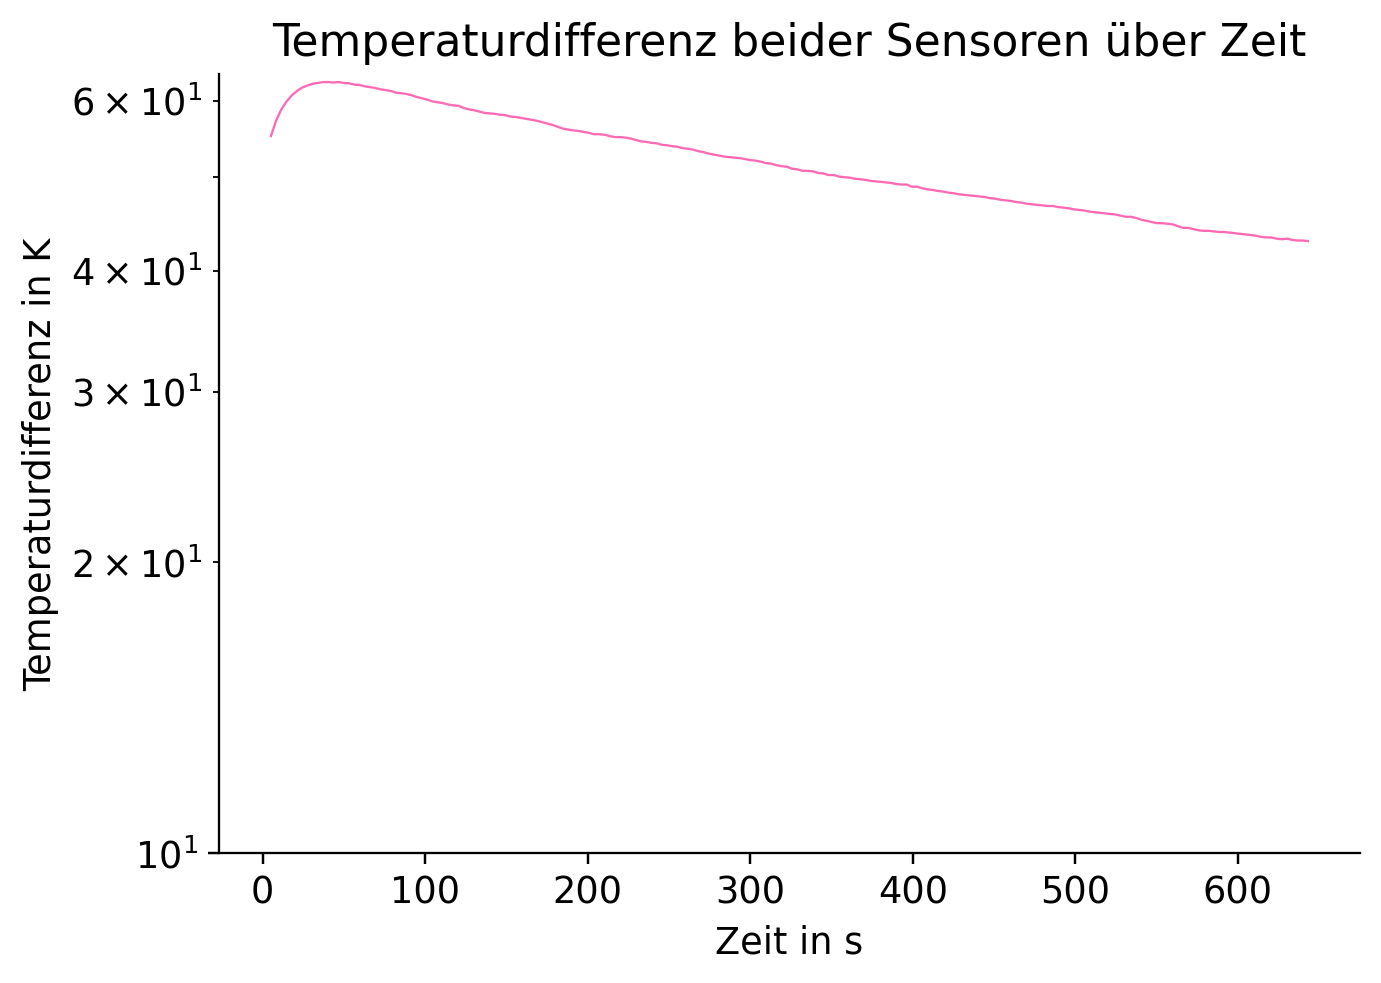

In [16]:
# TODO: Use the temperature and time data for plotting

plt.plot(data_time1, data_t1-data_t2, color ="hotpink",)
plt.yscale("log",base = 10)
    
plt.xlabel("Zeit in s")
plt.ylabel("Temperaturdifferenz in K")
#Hochsetzen des graphen für bessere Sichtbarkeit
plt.ylim(bottom=1*10) 
plt.title("Temperaturdifferenz beider Sensoren über Zeit");

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [19]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

# nach Umstellung der oberen Gleichung durch logarithmisieren wird klar, dass es ein Polynom 1. Grades ist
K_poly = np.polyfit (data_time1, data_t1-data_t2, deg = 1) 
start_temp_1 = data_t1[0]
end_temp_1 = data_t2[199]

K = K_poly[0]

# DONE #

#### (iV) Ergebnis

In [20]:
# TODO: Print result

print(K)

# DONE #

-0.03221402433602734


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetz erklärt, dass die Wärmeverlustrate proportional zum Temperaturunterschied zwischen Umgebung und Körper ist. K ist negativ und zeigt das damit sehr gut.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich habe vom Newtonschen Abkühlungsgesetz zum ersten Mal gehört und mich damit vertraut gemacht.